# Data Narrative: Pokémon
## By Jenna Tan - BIOS 512

For my final course project, I chose to analyze a complete dataset of pokémon and their stats from Generation 1 to Generation 7 in honor of the release of Generation 8 on November 16, 2019. The dataset contains a separate observation for each pokémon and their stats, such as attack, defense, and hit points (HP) which affect their ability to battle in the video game.

# Data Cleaning

This dataset was taken from Kaggle and was originally published by user abcsds. It contains a total of 800 observations. In the cleaning process, I created three datasets, `df.long`, `df.ordinary`, and `df.shuckle`.

The `df.long` dataset has a separate observation for each pokémon and their type, as many pokémon have dual types, unlike the original dataset which listed the pokémon's type in separate variables in a wide format. By transforming the data into a long format, we can now accurately count the frequency of pokémon for each pokemon type. Duplicate versions of pokémon were removed for this dataset. We removed the mega-version of pokémon (introduced in Generation 6) and the different sizes (see Pumpkaboo Average Size, Small Size, Large Size etc).

The `df.ordinary` dataset contains only ordinary pokémon. Legendaries were removed due to their abnormally high and powerful stats. Other duplicates were also removed as described for the `df.long` dataset. A new variable was created to label pokémon who had defense stat equal to their sp. def stat.

The `df.shuckle` dataset only contains one observation, the pokémon shuckle. This dataset is used to label shuckle's datapoint in the scatterplot as its'defense stat is abnormally high compared to the other pokémon.

In [1]:
# Import packages
library('tidyverse')
library('plotly')
library('ggrepel')

# Import dataset
# Originally from Kaggle: https://www.kaggle.com/abcsds/pokemon
df = read_csv('https://raw.githubusercontent.com/the-tanvan/BIOS512/master/course-project/Pokemon.csv')

# Removed duplicates from dataset (ie. mega version, different sizes)
df = distinct(df, `#`, .keep_all = TRUE)

# Convert dataset from wide to long with a separate observation for each type when pokémon are dual types
df.long = df %>%
    pivot_longer(cols = -one_of("#", "Name", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", 
                                "Legendary"), names_to = 'Type Number', values_to = 'Type') %>%
    filter(Type != "NA") %>%
    mutate(Type=fct_lump(Type, n=19)) %>%
    mutate(Type=fct_infreq(Type))

# Label pokémon that have equivalent defense and special defense stats and remove legendary pokémon
df.ordinary = df %>%
    filter(Legendary == "FALSE") %>%
    mutate(`Pokemon with a defense that equals their sp. def`=ifelse(Defense==`Sp. Def`,"TRUE","FALSE"))

# Print the number of pokémon with a defense stat that equals their sp. def
length(which(df.ordinary$`Pokemon with a defense that equals their sp. def` == "TRUE"))

# Create dataset for labeling shuckle in final scatterplot
df.shuckle = df.ordinary %>% filter(`Pokemon with a defense that equals their sp. def`== "TRUE" & Defense > 200)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0          ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0.9000     ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Parsed with column specification:
cols(
  `#` = col_double(),
  Name = col_character(),
  `Type 1` = col_character(),
  `Type 2` = col_character(),
  Total = col_double(),
  HP = col_double(),
  Attack = col_double(),
  Defense = col_double(),
  `Sp. Atk` = col_double(),
  `Sp. Def` = col_double(),
  Speed = col_double(),
  Generati

[1] 215

# Data Visualization

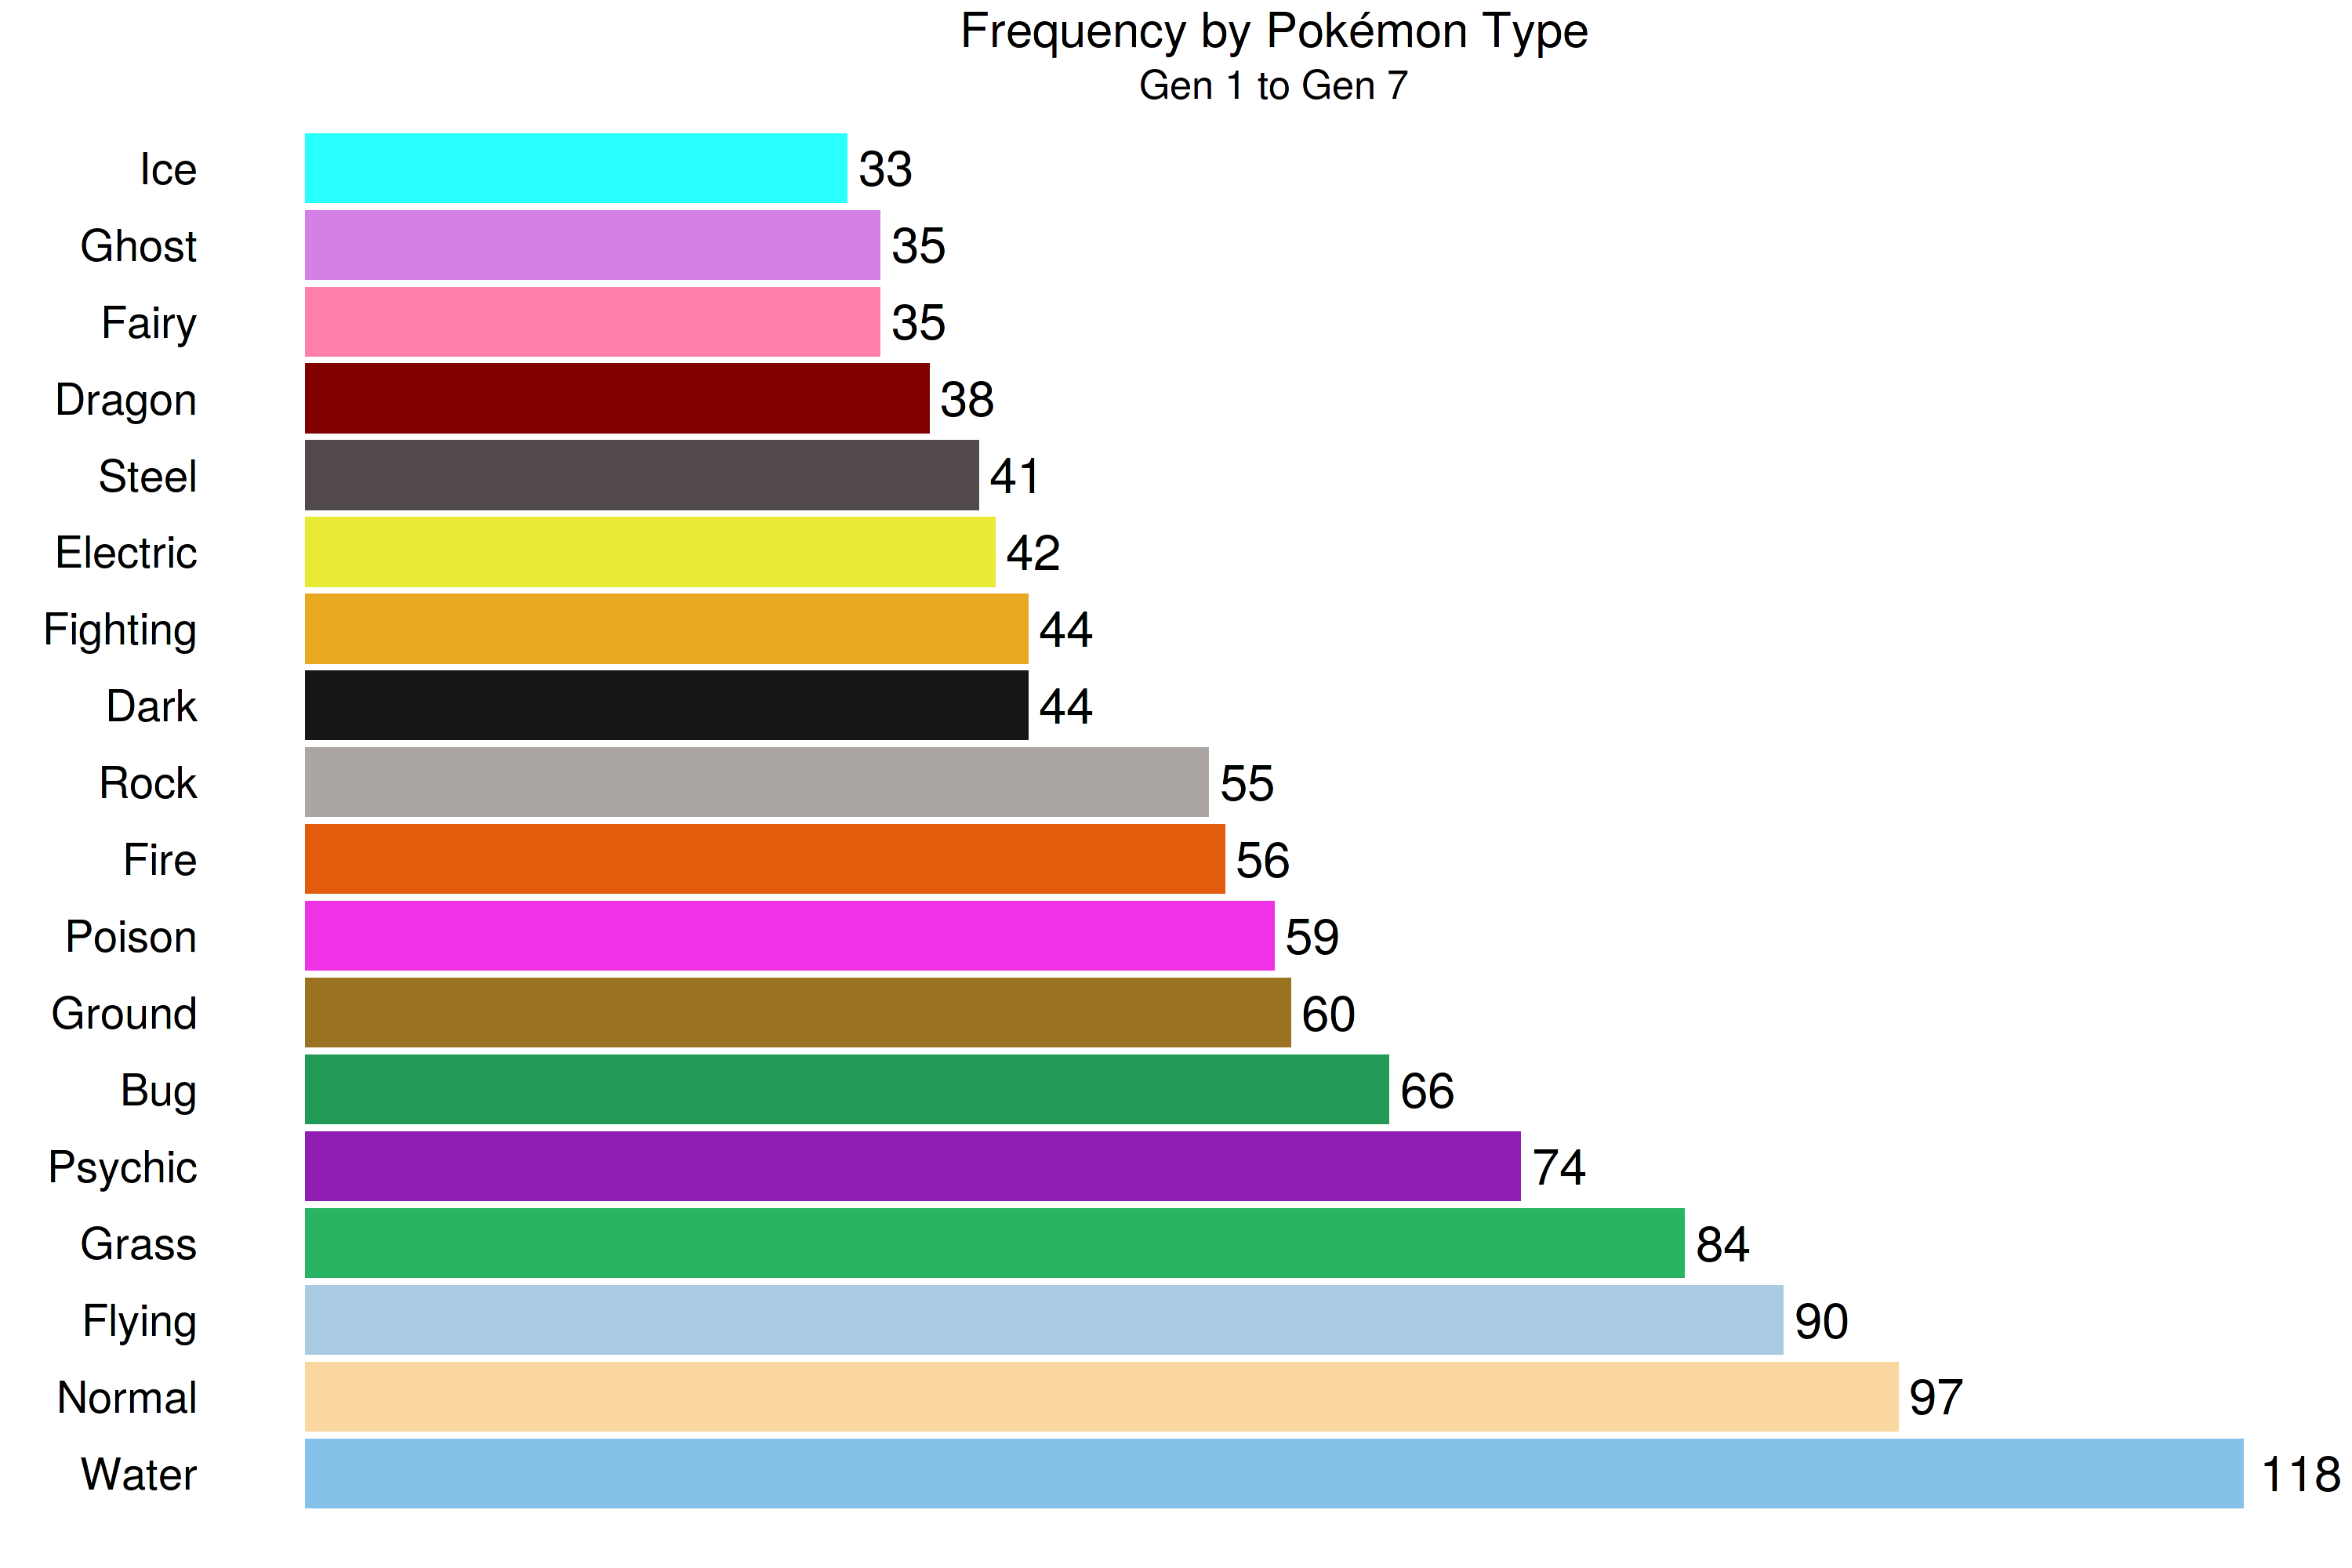

In [2]:
# Create bar chart of frequency pokémon types in increasing order
options(repr.plot.res = 200, repr.plot.width=15, repr.plot.height = 10)

cbbPalette <- c('#85C1E9', '#FAD7A0', '#A9CCE3', '#28B463', '#911EB4', 
                '#229954', '#997322', '#f032e6', '#E25C0B', '#ABA6A4', 
                '#161616', '#E8A821', '#E8EA36', '#51494B', '#800000', 
                '#FF7FA8', '#D480E7', '#29FFFD')

p = ggplot(df.long, aes(x=Type, fill=Type))
p = p + geom_bar()
p = p + coord_flip()
p = p + geom_text(stat='count', aes(label=..count..), hjust=-0.2, size=8)
p = p + theme(axis.text.y=element_text(color="black",size=20),axis.text.x=element_blank(),
              legend.position="none",
              plot.title = element_text(size=22, hjust=0.5),
              plot.subtitle = element_text(size=18, hjust=0.5))
p = p + labs(x="", 
             y="",
             subtitle='Gen 1 to Gen 7')
p = p + theme(panel.grid.major = element_blank(), 
              panel.grid.minor = element_blank(), 
              panel.border = element_blank(),
              panel.background = element_blank(),
              axis.ticks = element_blank())
p = p + scale_fill_manual(values=cbbPalette)
p = p + ggtitle("Frequency by Pokémon Type")
p

# Bar Chart of Frequency by Pokémon Type

This bar chart shows the frequency of each pokémon type in increasing order. Based on this visualization, we can determine that the most frequent types are water, normal and flying. The most rare types are ice, ghost and fairy.

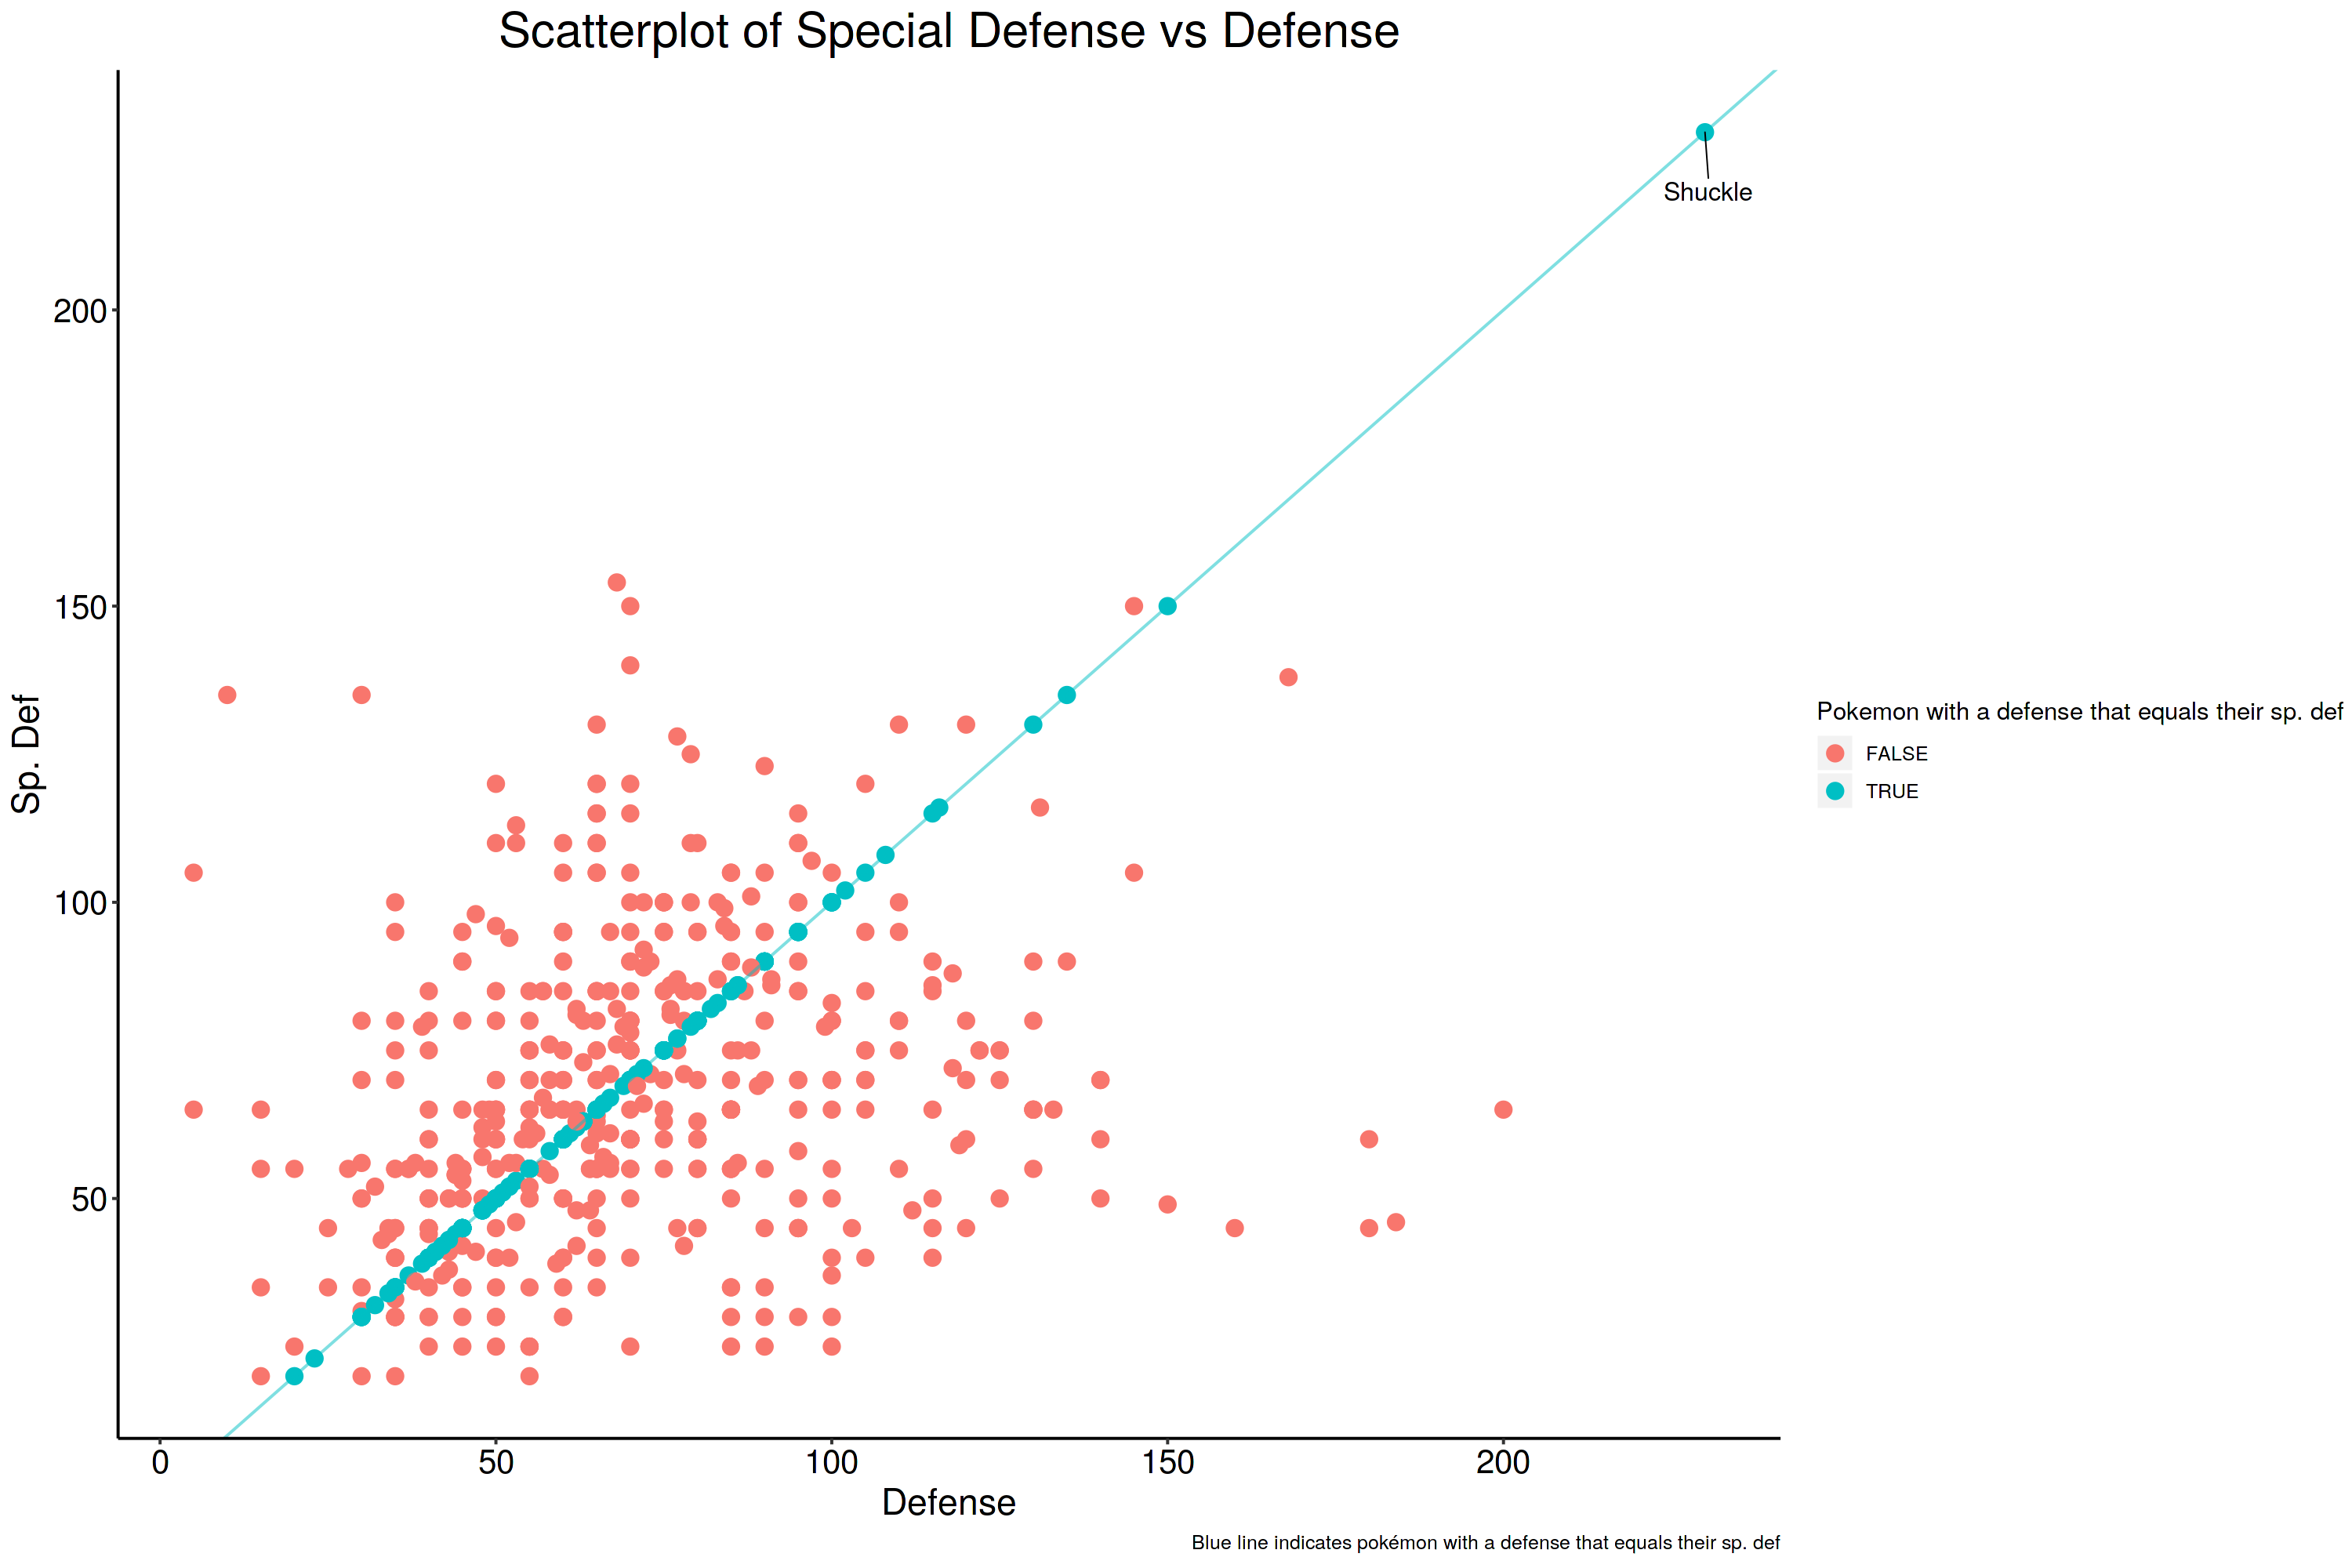

In [3]:
options(repr.plot.res = 200, repr.plot.width=15, repr.plot.height = 10)
p = ggplot(df.ordinary, aes(x=Defense, y=`Sp. Def`, color=`Pokemon with a defense that equals their sp. def`))
p = p + geom_point(size=3)
p = p + geom_abline(intercept=0, slope=1, alpha=0.5, color='#00BFC4')
p = p + geom_text_repel(data=df.shuckle,
                        segment.color = '#000000',
                        segment.size = 0.25,
                        nudge_x = 0.5,
                        nudge_y = -10,
                        aes(x = Defense, y = `Sp. Def`, label = Name),
                        size = 4,
                        show.legend = FALSE,
                        color="black")
p = p + ggtitle("Scatterplot of Special Defense vs Defense")
p = p + labs(caption="Blue line indicates pokémon with a defense that equals their sp. def")
p = p + theme(plot.title = element_text(size=22, hjust=0.5),
              axis.text.y=element_text(color="black",size=15),
              axis.text.x=element_text(color="black",size=15),
              axis.title.y = element_text(size = rel(1.5)),
              axis.title.x = element_text(size = rel(1.5)),
              plot.subtitle = element_text(size=12, hjust=0.5),
              panel.background = element_rect(fill = 'white', colour = 'white'),
              axis.line = element_line(colour = 'black'))
p

# Scatterplot of Defense vs. Sp. Defense

In this visualization, we can see the relationship between defense and sp. def for each pokémon. Overall, as a pokémon's defense increases so does their sp. def. The line graphed in the scatterplot is not a regression line, but a line with slope of 0 and a intercept of 0. Any pokémon landing on ths line will have a defense stat that is equal to their sp. def. 215 pokémon fit this criteria. With this visualization, we can see there is one pokémon that has a tremendously high defense and sp. def stat. This pokémon is Shuckle, which is pictured below.
![](https://vignette.wikia.nocookie.net/pokemontowerdefensetwo/images/e/e5/213_large.png/revision/latest?cb=20140413081355 "Don't mess with shuckle")